<a href="https://colab.research.google.com/github/Darkandpure/Machine_learning-/blob/main/Fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets read the dataset

In [1]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/machine_learning_dataset/Fraud.csv")

# OK, great now lets have a look at some rows

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# lets have a look to types of the dataset

In [4]:
data.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- Fine, we dont have null vlaues, cleaning not required, good to go

# Encoding categorical variables
-  the **Type** column is categorical, and the remaining columns are numeric.
- Choosed one hot encoding as here is no inherent order or ranking among the categories.

In [6]:
# Perform one-hot encoding on the 'type' column
encoded_data = pd.get_dummies(data, columns=['type'])

# Print the encoded data
encoded_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the 'type' column
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


# Now lets do some feature engineering

#1. Transaction Frequency
- the number of transactions initiated by each customer (nameOrig) or received by each recipient (nameDest)
- This can provide insights into the transaction behavior and identify suspicious activity.

In [10]:
# Calculate the number of transactions initiated by each customer (nameOrig)
transactions_by_customer = data['nameOrig'].value_counts()

# Calculate the number of transactions received by each recipient (nameDest)
transactions_by_recipient = data['nameDest'].value_counts()

# Print the results
print("Transactions initiated by each customer:")
print(transactions_by_customer.head())
print("\nTransactions received by each recipient:")
print(transactions_by_recipient.head())

Transactions initiated by each customer:
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
Name: nameOrig, dtype: int64

Transactions received by each recipient:
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: nameDest, dtype: int64


# 2. Transaction Amount Deviation

-  compute the difference between the transaction amount (amount) and the average transaction amount for each customer (nameOrig) or recipient (nameDest)

- Unusually large or small deviations from the average could indicate fraudulent activity.

In [ ]:


# Compute the average transaction amount for each customer (nameOrig)
customer_avg_amount = data.groupby('nameOrig')['amount'].transform('mean')

# Compute the difference between the transaction amount and the average amount for each customer
customer_amount_diff = data['amount'] - customer_avg_amount

# Compute the average transaction amount for each recipient (nameDest)
recipient_avg_amount = data.groupby('nameDest')['amount'].transform('mean')

# Compute the difference between the transaction amount and the average amount for each recipient
recipient_amount_diff = data['amount'] - recipient_avg_amount

# Print the results
print("Difference between transaction amount and average amount for each customer:")
print(customer_amount_diff.head())
print("\nDifference between transaction amount and average amount for each recipient:")
print(recipient_amount_diff.head())


# 3. Time-based Features
- Extract additional time-based features from the step column, such as the hour of the day, the day of the week, or the month
- These features can capture potential patterns or anomalies in fraudulent transactions based on specific time periods.

In [11]:
# Convert step to datetime
data['timestamp'] = pd.to_datetime(data['step'] * 3600, unit='s')

# Extract hour of the day, day of the week, and month
data['hour_of_day'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month

# Print the results
print("Hour of the day:")
print(data['hour_of_day'].head())
print("\nDay of the week:")
print(data['day_of_week'].head())
print("\nMonth:")
print(data['month'].head())


Hour of the day:
0    1
1    1
2    1
3    1
4    1
Name: hour_of_day, dtype: int64

Day of the week:
0    3
1    3
2    3
3    3
4    3
Name: day_of_week, dtype: int64

Month:
0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64


# lets see it vizually

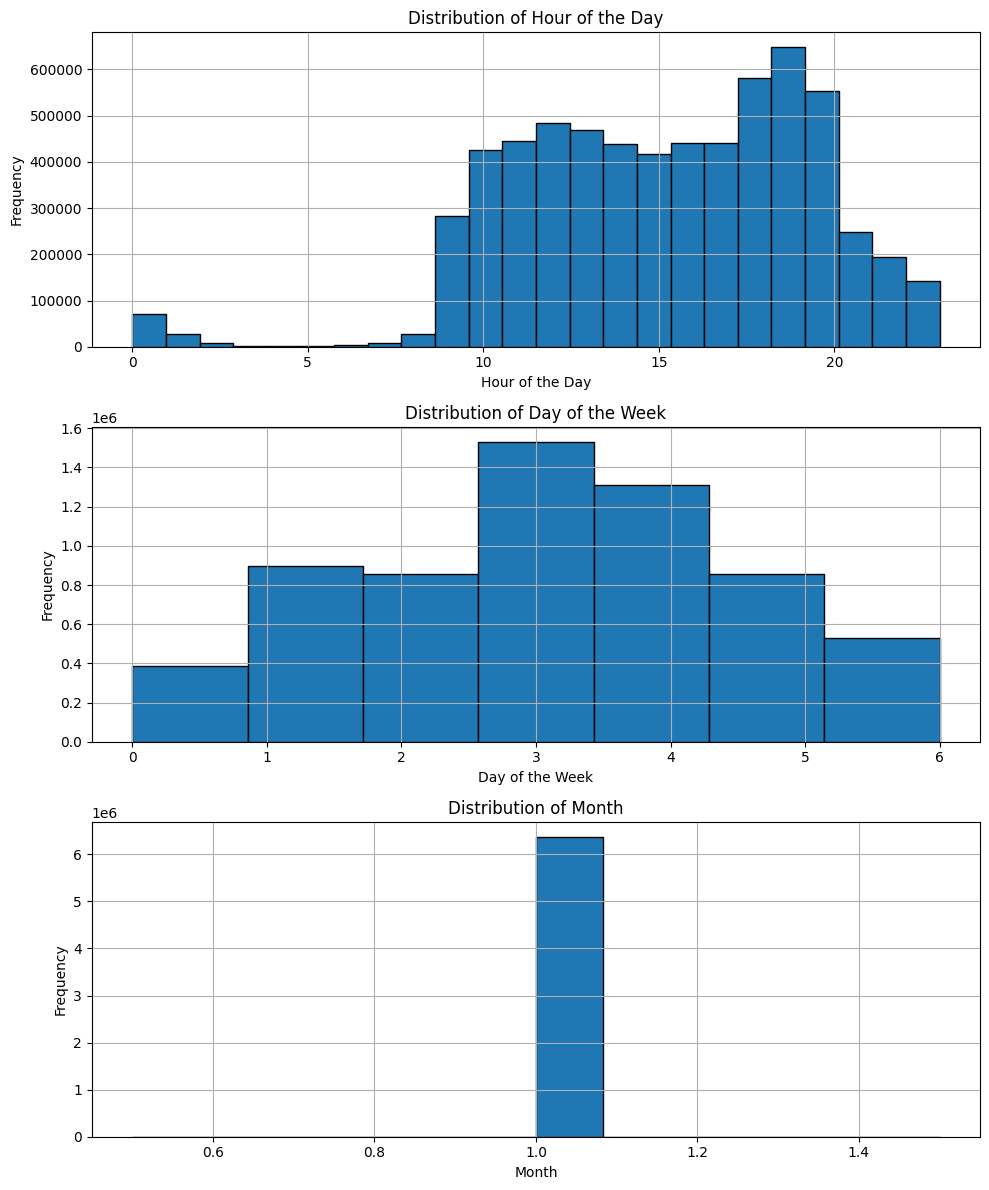

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for hour of the day, day of the week, and month
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
data['hour_of_day'].hist(ax=axes[0], bins=24, edgecolor='black')
data['day_of_week'].hist(ax=axes[1], bins=7, edgecolor='black')
data['month'].hist(ax=axes[2], bins=12, edgecolor='black')

# Set plot labels and titles
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Hour of the Day')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Day of the Week')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Month')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
